In [1]:
from google.colab import drive

drive.mount('/content/drive')



Mounted at /content/drive


In [2]:
import argparse

import cv2

import os
from sklearn.utils import shuffle
from tqdm import tqdm

import numpy as np


In [3]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)



train_generator = train_datagen.flow_from_directory(
        '/content/drive/MyDrive/dataset',
        target_size=(370, 370),
        batch_size=924,
        shuffle=False
        )



Found 922 images belonging to 2 classes.


In [4]:
X_train, y_train = next(train_generator)
print(len(X_train))
len(y_train)

922


922

(370, 370, 3)


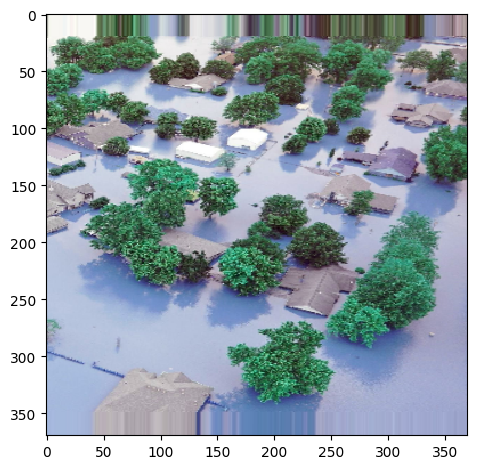

In [6]:

resizedimgs=X_train
label_names=train_generator.labels
# resizedimgs, label_names = shuffle(resizedimgs, label_names)
from skimage import io

io.imshow(resizedimgs[0])
# io.imshow(resizedimgs[1])
# io.imshow(resizedimgs[2])
# io.imshow(resizedimgs[3])
# io.imshow(resizedimgs[4])
# io.imshow(resizedimgs[5])
# io.imshow(resizedimgs[6])
# io.imshow(resizedimgs[7])
label_names[0:10]
print(resizedimgs[2].shape)


In [ ]:
RGBimgs=[]
for i in resizedimgs:
  RGBimgs.append( cv2.cvtColor(i, cv2.COLOR_BGR2RGB))

In [8]:
image = cv2.cvtColor(resizedimgs[2], cv2.COLOR_BGR2RGB)

In [9]:
# Reshaping the image into a 2D array of pixels and 3 color values (RGB)
pixel_vals = image.reshape((-1,3))

# Convert to float type
pixel_vals = np.float32(pixel_vals)


True

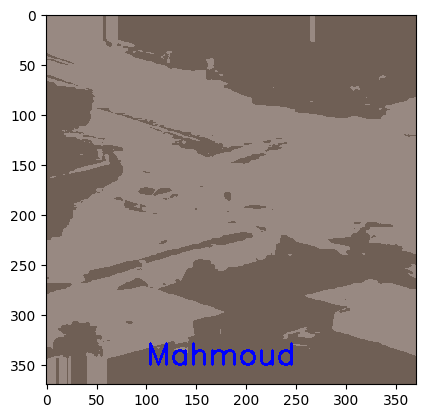

In [69]:
#the below line of code defines the criteria for the algorithm to stop running,
#which will happen is 100 iterations are run or the epsilon (which is the required accuracy)
#becomes 85%
import matplotlib.pyplot as plt
image = cv2.cvtColor(resizedimgs[2], cv2.COLOR_BGR2RGB)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.85)

# then perform k-means clustering with number of clusters defined as 3
#also random centres are initially choosed for k-means clustering
k = 2
pixel_vals = image.reshape((-1,3))

# Convert to float type
pixel_vals = np.float32(pixel_vals)
retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)



segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
segmented_image = segmented_data.reshape((image.shape))


############3
text = 'Mahmoud'
  
# font
font = cv2.FONT_HERSHEY_SIMPLEX
  
# org
org = (100,350)
  
# fontScale
fontScale = 1
   
# Red color in BGR
color = (0, 0, 255)
  
# Line thickness of 2 px
thickness = 2
   
# Using cv2.putText() method
segmented_image2 = cv2.putText(segmented_image, text, org, font, fontScale, 
                 color, thickness, cv2.LINE_AA, False)
  

##########3


plt.imshow(segmented_image2)
cv2.imwrite("nn.jpg",255*segmented_image2)


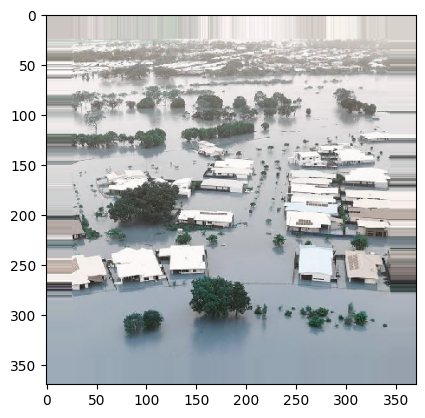

In [73]:
plt.imshow(resizedimgs[120])

In [72]:
import matplotlib.pyplot as plt
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 1)
k=2
ff=0
for i in resizedimgs[0:460]:
  image = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
  pixel_vals = image.reshape((-1,3))

# Convert to float type
  pixel_vals = np.float32(pixel_vals)
 
  retval, labels, centers = cv2.kmeans(pixel_vals, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  segmented_data = centers[labels.flatten()]

# reshape data into the original image dimensions
  segmented_image = segmented_data.reshape((image.shape))
  text = 'Non-Flooded pixels: the most colorful'
  
# font
  font = cv2.FONT_HERSHEY_SIMPLEX
    
  # org
  org = (10,350)
    
  # fontScale
  fontScale = .55
    
  # Red color in BGR
  color = (0, 2, 5)
    
  # Line thickness of 2 px
  thickness = 2
    
  # Using cv2.putText() method
  segmented_image2 = cv2.putText(segmented_image, text, org, font, fontScale, 
                  color, thickness, cv2.LINE_AA, False)
  cv2.imwrite(str(ff)+".jpg",255* segmented_image2)
    
  ff=ff+1
  


In [ ]:
features=[]
for i in resizedimgs:
  features.append(np.reshape(i, (370*370*3)))

print(np.array(features).shape)



(922, 410700)


In [ ]:
import pandas as pd
X = pd.DataFrame(features)
y = pd.Series(label_names)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.2,
                                                    random_state=142)

# look at the distrubution of labels in the train set
pd.Series(y_train).value_counts()

In [ ]:
svm = SVC(kernel='linear', probability=True, random_state=123)

# fit model
svm.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report
print(len(X_test))
y_pred = svm.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred))


In [ ]:
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import display
%matplotlib inline

import pandas as pd
import numpy as np

from PIL import Image

from skimage.feature import hog
from skimage.color import rgb2gray

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC

from sklearn.metrics import roc_curve, auc
import numpy as np # linear algebra
import json
from matplotlib import pyplot as plt
from skimage import color
from skimage.feature import hog
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score

In [ ]:
data_gray = [ color.rgb2gray(i) for i in resizedimgs]
plt.imshow(data_gray[51])

In [ ]:
# ppc = 16
# hog_images = []
# hog_features = []
# for image in data_gray:
#     fd,hog_image = hog(image, orientations=8, pixels_per_cell=(ppc,ppc),cells_per_block=(4, 4),block_norm= 'L2',visualize=True)
#     hog_images.append(hog_image)
#     hog_features.append(fd)

In [ ]:
# clf = svm.SVC()
# hog_features = np.array(hog_features)
# data_frame = np.hstack((hog_features))


In [ ]:
# X = pd.DataFrame(hog_features)
# y = pd.Series(label_names)
# X_train, X_test, y_train, y_test = train_test_split(X,
#                                                     y,
#                                                     test_size=.2,
#                                                     random_state=142)

# # look at the distrubution of labels in the train set
# pd.Series(y_train).value_counts()

In [ ]:
# clf.fit(X_train,y_train)

In [ ]:
# y_pred = clf.predict(X_test)
# print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
# print('\n')
# print(classification_report(y_test, y_pred))

In [ ]:
def create_features(img):
    # flatten three channel color image
    
    color_features = img.flatten()
    # convert image to greyscale
    grey_image = rgb2gray(img)
    # get HOG features from greyscale image
    hog_features = hog(grey_image, block_norm='L2-Hys', pixels_per_cell=(16, 16))
    # combine color and hog features into a single array
    flat_features = np.hstack((hog_features))
    return flat_features
bombus_features = create_features(resizedimgs[0])
print(bombus_features)

In [ ]:
def create_feature_matrix(imgs):
    features_list = []
    
    for img_id in imgs:
        # load image
        
        # get features for image
        image_features = create_features(img_id)
        features_list.append(image_features)
        
    # convert list of arrays into a matrix
    feature_matrix = np.array(features_list)
    return feature_matrix

# run create_feature_matrix on our dataframe of images
feature_matrix = create_feature_matrix(resizedimgs)
print(feature_matrix.shape)

In [ ]:
# define standard scaler
ss = StandardScaler()
# run this on our feature matrix
bees_stand = ss.fit_transform(feature_matrix)

pca = PCA(n_components=500)
# use fit_transform to run PCA on our standardized matrix
bees_pca = ss.fit_transform(bees_stand)
# look at new shape
print('PCA matrix shape is: ', bees_pca.shape)

In [ ]:
X = pd.DataFrame(bees_pca)
y = pd.Series(label_names)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=.2,
                                                    random_state=142)

# look at the distrubution of labels in the train set
pd.Series(y_train).value_counts()

NameError: ignored

In [ ]:
# define support vector classifier
svm = SVC(kernel='linear', probability=True, random_state=123)

# fit model
svm.fit(X_train, y_train)

In [ ]:
from sklearn.metrics import classification_report
print(len(X_test))
y_pred = svm.predict(X_test)

# calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

print('Model accuracy is: ', accuracy)
print(classification_report(y_test,y_pred))


In [ ]:
from sklearn.linear_model import LogisticRegression


classifier = LogisticRegression()
classifier.fit(X_train, y_train)


res=classifier.predict(X_test)
accuracy = accuracy_score(y_test, res)
print(accuracy)

In [ ]:

# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.pipeline import make_pipeline
# from sklearn.ensemble import BaggingClassifier
# pipeline = make_pipeline(StandardScaler(),
#                         LogisticRegression(random_state=1))
# #
# # Instantiate the bagging classifier
# #
# bgclassifier = BaggingClassifier(base_estimator=pipeline, n_estimators=100,
#                                  max_features=10,
#                                  max_samples=100,
#                                  random_state=1, n_jobs=5)
# #
# # Fit the bagging classifier
# #
# bgclassifier.fit(X_train, y_train)
# #
# # Model scores on test and training data
# #
# print('Model test Score: %.3f, ' %bgclassifier.score(X_test, y_test),
#       'Model training Score: %.3f' %bgclassifier.score(X_train, y_train))

In [ ]:
# Importing all necessary libraries
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

img_width, img_height = 370, 370


In [ ]:
if K.image_data_format() == 'channels_first':
    	input_shape = (3, img_width, img_height)
else:
	input_shape = (img_width, img_height, 3)


In [ ]:
model=Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=input_shape))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))


In [ ]:
model.compile(loss='binary_crossentropy',
			optimizer='rmsprop',
			metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 368, 368, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 366, 366, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 183, 183, 64)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 183, 183, 64)      0         
                                                                 
 flatten (Flatten)           (None, 2143296)           0         
                                                                 
 dense (Dense)               (None, 128)               274342016 
                                                        

In [ ]:
X_train=resizedimgs.reshape(resizedimgs.shape[0],370,370,3)
y_train = np.asarray(label_names).astype('float32').reshape((-1,1))
# X_test=X_test.reshape(X_test.shape[0],28,28,1)

In [ ]:
model.fit(X_train, label_names, batch_size=32, epochs=15)

Epoch 1/15
29/29 [==============================] - 30s 529ms/step - loss: 8.6081 - accuracy: 0.6085
Epoch 2/15
29/29 [==============================] - 12s 414ms/step - loss: 0.6709 - accuracy: 0.6421
Epoch 3/15
29/29 [==============================] - 12s 417ms/step - loss: 0.6171 - accuracy: 0.6703
Epoch 4/15
29/29 [==============================] - 12s 419ms/step - loss: 0.6896 - accuracy: 0.6464
Epoch 5/15
29/29 [==============================] - 12s 421ms/step - loss: 0.5852 - accuracy: 0.6529
Epoch 6/15
29/29 [==============================] - 12s 421ms/step - loss: 0.5885 - accuracy: 0.6725
Epoch 7/15
29/29 [==============================] - 12s 428ms/step - loss: 0.6610 - accuracy: 0.6540
Epoch 8/15
29/29 [==============================] - 12s 430ms/step - loss: 0.5747 - accuracy: 0.6551
Epoch 9/15
29/29 [==============================] - 12s 427ms/step - loss: 0.4688 - accuracy: 0.7321
Epoch 10/15
29/29 [==============================] - 12s 428ms/step - loss: 0.4516 - accura

In [ ]:
scores = model.evaluate(X_train, y_train, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

NameError: ignored

In [ ]:
{layer.name: layer.get_weights() for layer in model.layers}

{'conv2d': [array([[[[ 1.14742346e-01, -5.98255098e-02, -3.56183760e-03,
            -1.63330361e-02, -6.22052476e-02, -3.44914617e-03,
            -7.60139599e-02, -7.81341419e-02,  5.31587692e-04,
             4.37375158e-02, -1.14252090e-01, -1.42256349e-01,
             7.25905923e-03,  8.68497491e-02, -2.50239912e-02,
             1.06697291e-01,  8.82230923e-02, -1.02670044e-01,
            -1.32237971e-01, -2.93329507e-02,  9.06251371e-02,
            -2.93272436e-02,  6.41079061e-03, -5.41298417e-03,
            -1.12360708e-01,  7.59825334e-02,  1.08420625e-01,
             3.11265327e-02,  7.93589279e-02, -8.32212046e-02,
            -1.02579154e-01, -5.79279140e-02],
           [-1.07625775e-01,  7.30982497e-02, -1.31517142e-01,
            -7.26057664e-02, -1.23572767e-01,  2.57367641e-02,
             2.68676151e-02,  7.07218200e-02, -1.86186638e-02,
             1.65834371e-02, -9.30794477e-02,  1.03157282e-01,
            -4.00928594e-02,  9.36783925e-02, -2.68841852e-02

In [ ]:
model.get_layer('dense').get_weights()

[array([[ 9.3501009e-04, -9.0418535e-04,  1.3400568e-05, ...,
         -2.9934212e-03, -8.1733975e-04, -2.5385264e-03],
        [ 3.1849585e-04,  8.3414186e-04, -7.8178290e-04, ...,
         -1.7770543e-04,  8.0109085e-04,  5.3168909e-04],
        [-4.2796992e-03,  2.9799092e-04, -1.1785652e-03, ...,
         -1.5642587e-03,  1.0618665e-03,  1.9163234e-04],
        ...,
        [-4.7265599e-04, -2.2566526e-03, -3.4586512e-03, ...,
         -1.8544684e-04, -1.2366625e-04, -7.9315342e-04],
        [-2.5254751e-03, -1.1461648e-03, -3.8923218e-04, ...,
          5.1108369e-04, -2.1885969e-03, -7.3999260e-04],
        [-1.2169685e-03, -8.8975561e-04, -1.0532876e-03, ...,
         -1.2710285e-03, -5.9807324e-05, -3.5389976e-03]], dtype=float32),
 array([-8.2962215e-05, -2.9945995e-03, -8.2742423e-05, -1.6000067e-03,
        -2.6351712e-03, -3.1086775e-03, -2.8440976e-03, -2.2948177e-03,
         1.3264362e-05, -2.3768123e-03, -3.0288331e-03,  2.2889534e-04,
        -3.6840420e-03,  2.4442554